Matriz Original (5x5):
[[3 3 4 4 4]
 [3 4 4 5 5]
 [4 4 5 5 5]
 [4 5 5 5 6]
 [5 5 6 6 6]]

Total de Pixels (MN): 25
Níveis de Intensidade (L): 8 (de 0 a 7)

--- Iniciando Equalização ---
Histograma (n_k):
[ 0  0  0  3  8 10  4  0]
PDF (p(r_k)):
[0.   0.   0.   0.12 0.32 0.4  0.16 0.  ]

CDF (Função de Distribuição Acumulada):
[0.   0.   0.   0.12 0.44 0.84 1.   1.  ]


Função de Transformação (Mapeamento):
Pixel Antigo 0  ->  Novo Pixel 0
Pixel Antigo 1  ->  Novo Pixel 0
Pixel Antigo 2  ->  Novo Pixel 0
Pixel Antigo 3  ->  Novo Pixel 1
Pixel Antigo 4  ->  Novo Pixel 3
Pixel Antigo 5  ->  Novo Pixel 6
Pixel Antigo 6  ->  Novo Pixel 7
Pixel Antigo 7  ->  Novo Pixel 7


Matriz Final Equalizada:
[[1 1 3 3 3]
 [1 3 3 6 6]
 [3 3 6 6 6]
 [3 6 6 6 7]
 [6 6 7 7 7]]



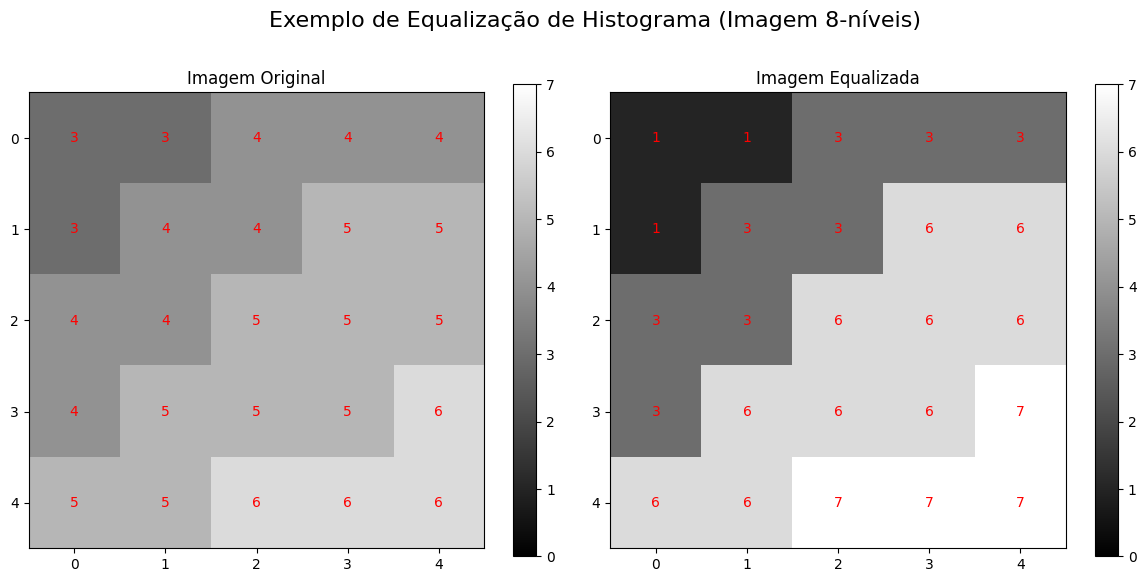

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotar_matriz_como_imagem(matriz, titulo, subplot_pos):
    """
    Função auxiliar para plotar uma matriz como imagem.
    Usamos vmin=0 e vmax=7 para garantir que a escala de cinza
    seja consistente entre as duas imagens (para nossa imagem de 3 bits).
    """
    plt.subplot(subplot_pos)
    # 'nearest' mostra os pixels como blocos nítidos
    plt.imshow(matriz, cmap='gray', vmin=0, vmax=7, interpolation='nearest')
    plt.title(titulo)

    # Adiciona o valor de cada pixel no centro da célula
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            plt.text(j, i, str(matriz[i, j]),
                     ha='center', va='center', color='red')

    plt.colorbar(ticks=range(8)) # Mostra a barra de cores de 0 a 7

# --- PASSO 1: MATRIZ ORIGINAL E CONFIGURAÇÕES ---
# Nossa matriz 5x5 de exemplo
original_matrix = np.array([
    [3, 3, 4, 4, 4],
    [3, 4, 4, 5, 5],
    [4, 4, 5, 5, 5],
    [4, 5, 5, 5, 6],
    [5, 5, 6, 6, 6]
])

# Níveis de intensidade (L=8 para 3 bits, de 0 a 7)
L = 8
# Número total de pixels (MN)
MN = original_matrix.size

print(f"Matriz Original (5x5):\n{original_matrix}\n")
print(f"Total de Pixels (MN): {MN}")
print(f"Níveis de Intensidade (L): {L} (de 0 a {L-1})\n")
print("--- Iniciando Equalização ---")

# --- PASSO 2: HISTOGRAMA (n_k) E PDF (p(r_k)) ---

# np.histogram conta as ocorrências de cada pixel.
# Definimos bins=L e range=(0, L) para ter 8 caixas (0, 1, ..., 7)
hist, bins = np.histogram(original_matrix.flatten(), bins=L, range=(0, L))

# O PDF é o histograma normalizado (dividido pelo total de pixels)
pdf = hist / MN

print(f"Histograma (n_k):\n{hist}")
print(f"PDF (p(r_k)):\n{pdf}\n")

# --- PASSO 3: FUNÇÃO DE DISTRIBUIÇÃO ACUMULADA (CDF) ---

# A CDF é a soma acumulada do PDF
cdf = np.cumsum(pdf)

print("CDF (Função de Distribuição Acumulada):")
print(cdf)
print("\n")

# --- PASSO 4: FUNÇÃO DE TRANSFORMAÇÃO (MAPEAMENTO) ---

# Fórmula: s_k = (L - 1) * CDF(r_k)
# Arredondamos para o inteiro mais próximo
mapping = np.round((L - 1) * cdf).astype(int)

print("Função de Transformação (Mapeamento):")
for r_k, s_k in enumerate(mapping):
    print(f"Pixel Antigo {r_k}  ->  Novo Pixel {s_k}")
print("\n")

# --- PASSO 5: APLICAÇÃO DA TRANSFORMAÇÃO ---

# O Numpy permite usar o array de mapeamento como um "dicionário"
# Para cada pixel na matriz original, ele busca o novo valor no array 'mapping'
equalized_matrix = mapping[original_matrix]

print(f"Matriz Final Equalizada:\n{equalized_matrix}\n")

# --- PASSO 6: PLOTAGEM DAS IMAGENS ---

# Configura a figura para ter dois plots lado a lado
plt.figure(figsize=(12, 6))
plt.suptitle(f"Exemplo de Equalização de Histograma (Imagem {L}-níveis)", fontsize=16)

# Plota a imagem original
plotar_matriz_como_imagem(original_matrix, "Imagem Original", 121)

# Plota a imagem equalizada
plotar_matriz_como_imagem(equalized_matrix, "Imagem Equalizada", 122)

# Exibe os gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Matriz Original 6x6 (I) ---
[[8 8 8 2 2 2]
 [8 8 8 2 2 2]
 [8 8 8 2 2 2]
 [8 8 8 9 9 9]
 [8 8 8 9 9 9]
 [8 8 8 9 9 9]]

--- Kernel Laplaciano 3x3 (W) ---
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]

--- Matriz Laplaciana 6x6 (G = I * W) ---
[[ 16   8  14  -4   2   4]
 [  8   0   6  -6   0   2]
 [  8   0   6 -13  -7  -5]
 [  8   0  -1   8   7  16]
 [  8   0  -1   1   0   9]
 [ 16   8   7  10   9  18]]

--- Imagem Nítida Final (I_sharp = I + G) ---
[[ 24  16  22  -2   4   6]
 [ 16   8  14  -4   2   4]
 [ 16   8  14 -11  -5  -3]
 [ 16   8   7  17  16  25]
 [ 16   8   7  10   9  18]
 [ 24  16  15  19  18  27]]

--- Imagem Nítida (Valores 'clipados' entre 0-10) ---
[[10 10 10  0  4  6]
 [10  8 10  0  2  4]
 [10  8 10  0  0  0]
 [10  8  7 10 10 10]
 [10  8  7 10  9 10]
 [10 10 10 10 10 10]]


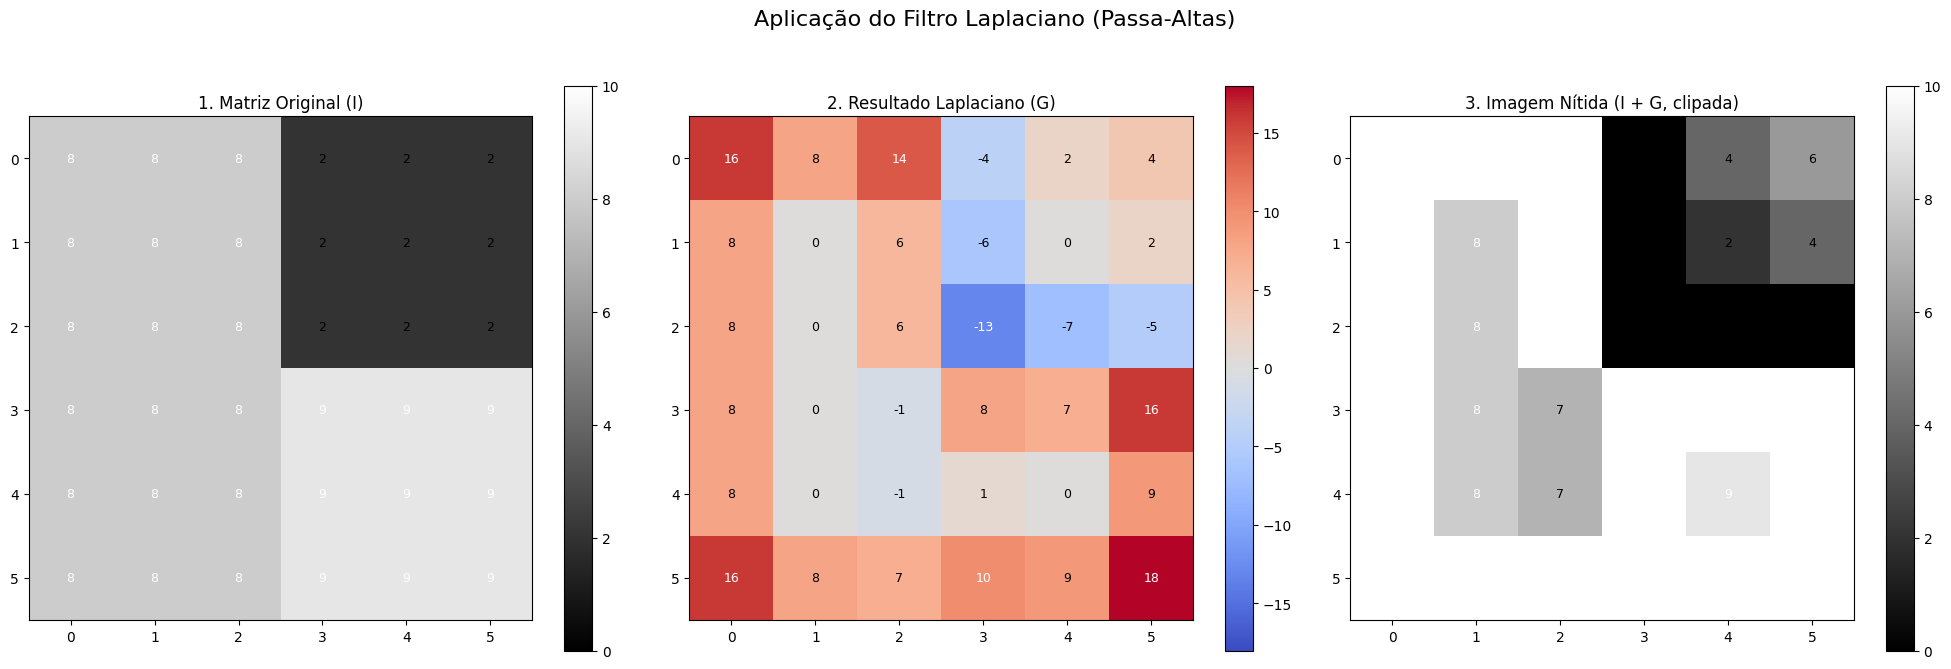

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def plotar_matriz_como_imagem(matriz, titulo, subplot_pos, cmap, vmin, vmax):
    """
    Função auxiliar para plotar uma matriz como imagem com escala e cores definidas.
    """
    plt.subplot(subplot_pos)
    plt.imshow(matriz, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest')
    plt.title(titulo)

    # Adiciona o valor de cada pixel no centro da célula
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            # Cor do texto se ajusta para melhor contraste
            cor_texto = 'white' if abs(matriz[i, j]) > (vmax * 0.7) and cmap == 'gray' else 'black'
            if cmap == 'coolwarm':
                cor_texto = 'white' if abs(matriz[i, j]) > (vmax * 0.5) else 'black'

            plt.text(j, i, str(matriz[i, j]),
                     ha='center', va='center', color=cor_texto, fontsize=9)

    plt.colorbar() # Mostra a barra de cores

# --- PASSO 1: O KERNEL E A MATRIZ ---
W = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

I = np.array([
    [8, 8, 8, 2, 2, 2],
    [8, 8, 8, 2, 2, 2],
    [8, 8, 8, 2, 2, 2],
    [8, 8, 8, 9, 9, 9],
    [8, 8, 8, 9, 9, 9],
    [8, 8, 8, 9, 9, 9]
])

print("--- Matriz Original 6x6 (I) ---")
print(I)

print("\n--- Kernel Laplaciano 3x3 (W) ---")
print(W)

# --- PASSO 2: APLICAÇÃO DA CONVOLUÇÃO (O "FILTRO") ---
G = convolve2d(I, W, mode='same', boundary='fill', fillvalue=0)

print("\n--- Matriz Laplaciana 6x6 (G = I * W) ---")
print(G)

# --- PASSO 3: REALCE (SHARPENING) ---
I_sharp = I + G

print("\n--- Imagem Nítida Final (I_sharp = I + G) ---")
print(I_sharp)

# "Clipando" os valores para uma faixa visualizável (0-10)
I_sharp_clipped = np.clip(I_sharp, 0, 10)

print("\n--- Imagem Nítida (Valores 'clipados' entre 0-10) ---")
print(I_sharp_clipped)

# --- PASSO 4: PLOTAGEM DAS IMAGENS ---

# Configura a figura para ter três plots lado a lado
plt.figure(figsize=(20, 7))
plt.suptitle("Aplicação do Filtro Laplaciano (Passa-Altas)", fontsize=16)

# 1. Plotar a Imagem Original
plotar_matriz_como_imagem(I, "1. Matriz Original (I)", 131,
                          cmap='gray', vmin=0, vmax=10)

# 2. Plotar o Resultado Laplaciano
# Encontrar o maior valor absoluto para centralizar a barra de cores em 0
v_abs_max = np.max(np.abs(G))
plotar_matriz_como_imagem(G, "2. Resultado Laplaciano (G)", 132,
                          cmap='coolwarm', vmin=-v_abs_max, vmax=v_abs_max)

# 3. Plotar a Imagem Nítida Final
plotar_matriz_como_imagem(I_sharp_clipped, "3. Imagem Nítida (I + G, clipada)", 133,
                          cmap='gray', vmin=0, vmax=10)

# Salva a figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("laplacian_filter_visualization_final.png")